In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 #library of Python bindings designed to solve computer vision problems
import os 
from random import shuffle 
from tqdm import tqdm #for progress bar
from PIL import Image
import tensorflow as tf
from tensorflow import keras

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


In [2]:
train_n='../env/chest_xray/train/NORMAL/'
train_p='../env/chest_xray/train/PNEUMONIA/'
test_n='../env/chest_xray/test/NORMAL/'
test_p='../env/chest_xray/test/PNEUMONIA/'

In [3]:
import os
image_size=150

In [4]:
def train_data():
    train_data_normal=[]
    train_data_pneumonia=[]
    for img1 in tqdm(os.listdir(train_n)):  #normal images
        path=os.path.join(train_n, img1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)   #grayscaled image
        img1 = cv2.resize(img1, (image_size, image_size))   #resizing image to 150 x 150
        train_data_normal.append(img1)
    for img2 in tqdm(os.listdir(train_p)):  #pneumonia images
        path=os.path.join(train_p, img2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_pneumonia.append(img2)
    train_data= np.concatenate((np.asarray(train_data_normal),np.asarray(train_data_pneumonia)),axis=0)
    return train_data 

In [5]:
def test_data():
    test_data_normal=[]
    test_data_pneumonia=[]
    for img1 in tqdm(os.listdir(test_n)):   #normal images
        path=os.path.join(test_n, img1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_normal.append(img1)
    for img2 in tqdm(os.listdir(test_p)):   #pneumonia images
        path=os.path.join(test_p, img2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_pneumonia.append(img2)
    test_data= np.concatenate((np.asarray(test_data_normal),np.asarray(test_data_pneumonia)),axis=0)
    return test_data 

In [6]:
train_data = train_data() 
test_data = test_data()

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:07<00:00, 50.97it/s]


In [7]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))   #normalization

In [8]:
z1 = np.zeros(1341)  # 0-> normal (train)
o1 = np.ones(3875)   # 1-> pneumonia  (train)
Y_train = np.concatenate((z1, o1), axis=0)
z = np.zeros(234)  # 0-> normal (test)
o = np.ones(390)   # 1-> pneumonia  (test)
Y_test = np.concatenate((z, o), axis=0)

In [9]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [10]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (5840, 150, 150)
Y shape:  (5840, 1)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
print("Number of training examples: " +str(x_train.shape[0]))
print("Number of testing examples: " +str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: 4964
Number of testing examples: 876
x_train shape: (4964, 150, 150)
y_train shape: (4964, 1)
x_test shape: (876, 150, 150)
y_test shape: (876, 1)


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150,150)),  #we need to flatten 2d data (150,150) to 1d data (22500=150x150) to pass into a neuron
    keras.layers.Dense(128, activation="relu"), #hidden layer
    keras.layers.Dense(128, activation="relu"), #hidden layer
    keras.layers.Dense(2, activation="softmax") #o/p layer (softmax-the probabilites for all o/p values will add upto 1)
])

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs=90)

Epoch 1/90
4964/4964 [==============================] - 9s 2ms/sample - loss: 0.5217 - accuracy: 0.8370
Epoch 2/90
4964/4964 [==============================] - 7s 2ms/sample - loss: 0.2484 - accuracy: 0.9009
Epoch 3/90
4964/4964 [==============================] - 7s 2ms/sample - loss: 0.2104 - accuracy: 0.9180
Epoch 4/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.2016 - accuracy: 0.9208
Epoch 5/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.1967 - accuracy: 0.92222s - los
Epoch 6/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.1694 - accuracy: 0.9378
Epoch 7/90
4964/4964 [==============================] - 7s 1ms/sample - loss: 0.1914 - accuracy: 0.9269
Epoch 8/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.1656 - accuracy: 0.9365
Epoch 9/90
4964/4964 [==============================] - 7s 1ms/sample - loss: 0.1740 - accuracy: 0.9335
Epoch 10/90
4964/4964 [==============================] -

4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0747 - accuracy: 0.9744
Epoch 77/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0802 - accuracy: 0.9708
Epoch 78/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0686 - accuracy: 0.9766
Epoch 79/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0960 - accuracy: 0.9635
Epoch 80/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0752 - accuracy: 0.97240s - loss: 0.0739 - accura
Epoch 81/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0634 - accuracy: 0.9780
Epoch 82/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0747 - accuracy: 0.9700
Epoch 83/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0741 - accuracy: 0.9732
Epoch 84/90
4964/4964 [==============================] - 8s 2ms/sample - loss: 0.0732 - accuracy: 0.9738
Epoch 85/90
4964/4964 [==================

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Tested accuracy:", test_acc)

876/876 [==============================] - 1s 839us/sample - loss: 0.2210 - accuracy: 0.9304
Tested accuracy: 0.9303653


0.0
Normal


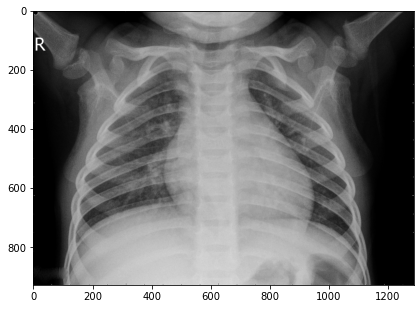

In [17]:
my_image = "NORMAL2-IM-1436-0001.jpeg"
val = "../env/chest_xray/val/NORMAL/"
path=os.path.join(val, my_image) 
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  #converting to grayscale
img1 = cv2.resize(img, (150, 150))     #resizing image input 
#print(img1)
img2 = np.reshape(img1,[1,150,150])    #reshaping image array to 3 dim
prediction = model.predict(img2)       #Prediction using trained model
prediction = prediction[-1]
result = str(prediction[-1])
print(result)

if result=='0.0':
    print("Normal")
else:
    print("Pneumonia")
    

image=Image.open(path)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")

In [21]:
model_json = model.to_json()
with open("chest_xray_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("chest_xray_model.h5")